## 科技动量因子

In [1]:
import pickle
import pandas as pd
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\stock_df.pkl', 'rb') as f:
    stock_df = pickle.load(f)
start_date = '2010-01-06'
end_date = '2024-12-27'
valid_dates = [d for d in stock_df.index if (d >= start_date and d <= end_date)]
month_ends = sorted(list(set([d[:7] for d in valid_dates])))
month_end_dates = [max([d for d in valid_dates if d[:7] == m]) for m in month_ends]
month_end_dates

['2010-01-29',
 '2010-02-26',
 '2010-03-31',
 '2010-04-30',
 '2010-05-31',
 '2010-06-30',
 '2010-07-30',
 '2010-08-31',
 '2010-09-30',
 '2010-10-29',
 '2010-11-30',
 '2010-12-31',
 '2011-01-31',
 '2011-02-28',
 '2011-03-31',
 '2011-04-29',
 '2011-05-31',
 '2011-06-30',
 '2011-07-29',
 '2011-08-31',
 '2011-09-30',
 '2011-10-31',
 '2011-11-30',
 '2011-12-30',
 '2012-01-31',
 '2012-02-29',
 '2012-03-30',
 '2012-04-27',
 '2012-05-31',
 '2012-06-29',
 '2012-07-31',
 '2012-08-31',
 '2012-09-28',
 '2012-10-31',
 '2012-11-30',
 '2012-12-31',
 '2013-01-31',
 '2013-02-28',
 '2013-03-29',
 '2013-04-26',
 '2013-05-31',
 '2013-06-28',
 '2013-07-31',
 '2013-08-30',
 '2013-09-30',
 '2013-10-31',
 '2013-11-29',
 '2013-12-31',
 '2014-01-30',
 '2014-02-28',
 '2014-03-31',
 '2014-04-30',
 '2014-05-30',
 '2014-06-30',
 '2014-07-31',
 '2014-08-29',
 '2014-09-30',
 '2014-10-31',
 '2014-11-28',
 '2014-12-31',
 '2015-01-30',
 '2015-02-27',
 '2015-03-31',
 '2015-04-30',
 '2015-05-29',
 '2015-06-30',
 '2015-07-

In [3]:
## 处理IPC数据
df_patent = pd.read_feather(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\parent_sub_company_patents.feather')

# 数据预处理：展开IPC代码
patent_expanded = []
for _, row in df_patent.iterrows():
    if pd.notna(row['category_num_ipc']):
        ipc_codes = str(row['category_num_ipc']).split(';')
        for code in ipc_codes:
            if len(code.strip()) >= 3:
                patent_expanded.append({
                    'company': row['related_ticker_symbol'],
                    'date': row['outhor_date'],
                    'ipc': code.strip()[:3]
                })

patent_df = pd.DataFrame(patent_expanded)
patent_df['date'] = pd.to_datetime(patent_df['date'])

# 获取所有IPC分类和公司
all_ipc_classes = sorted(patent_df['ipc'].unique())
companies = sorted(patent_df['company'].unique())

print(f"IPC分类: {len(all_ipc_classes)} 个, 公司: {len(companies)} 家")

IPC分类: 125 个, 公司: 4620 家


In [31]:
patent_df[patent_df['company']=='000001']

,company,date,ipc
107334,000001,2011-12-07,G06
107335,000001,2011-12-07,G07
235635,000001,2013-06-05,H04
235636,000001,2013-06-05,H04
235637,000001,2013-06-05,G06
...,...,...,...
3504198,000001,2024-12-27,G06
3504199,000001,2024-12-27,G06
3504200,000001,2024-12-27,G06
3504201,000001,2024-12-27,G06


In [14]:
import numpy as np
def get_all_tech_vectors_fast(stock_list, date, patent_df, all_ipc_classes):
    """向量化计算所有股票的技术向量"""
    # 筛选日期
    recent_patents = patent_df[patent_df['date'] <= pd.to_datetime(date)]
    
    if recent_patents.empty:
        return np.zeros((len(stock_list), len(all_ipc_classes)))
    
    # 使用crosstab快速计算
    tech_matrix = pd.crosstab(recent_patents['company'], recent_patents['ipc'])
    
    # 确保包含所有股票和IPC分类
    tech_matrix = tech_matrix.reindex(index=stock_list, columns=all_ipc_classes, fill_value=0)
    
    return tech_matrix.values

In [18]:
## 对齐股票，找到df_patent与stock_df共同的股票
stock_columns = set(stock_df.columns)
tech_companies = set(companies)
common_stocks = sorted(list(stock_columns.intersection(tech_companies)))
stock_df_filtered = stock_df[common_stocks]
len(common_stocks)

4602

In [27]:
common_stocks

['000001',
 '000002',
 '000005',
 '000008',
 '000012',
 '000016',
 '000017',
 '000019',
 '000021',
 '000024',
 '000026',
 '000027',
 '000030',
 '000032',
 '000035',
 '000037',
 '000038',
 '000039',
 '000040',
 '000050',
 '000055',
 '000059',
 '000060',
 '000061',
 '000063',
 '000065',
 '000066',
 '000070',
 '000078',
 '000089',
 '000090',
 '000099',
 '000100',
 '000151',
 '000153',
 '000156',
 '000157',
 '000158',
 '000301',
 '000333',
 '000338',
 '000400',
 '000401',
 '000402',
 '000404',
 '000407',
 '000409',
 '000410',
 '000413',
 '000418',
 '000420',
 '000422',
 '000423',
 '000425',
 '000429',
 '000488',
 '000498',
 '000504',
 '000510',
 '000511',
 '000513',
 '000515',
 '000518',
 '000521',
 '000522',
 '000523',
 '000525',
 '000527',
 '000528',
 '000530',
 '000536',
 '000538',
 '000539',
 '000541',
 '000543',
 '000544',
 '000546',
 '000550',
 '000551',
 '000552',
 '000553',
 '000559',
 '000561',
 '000565',
 '000566',
 '000568',
 '000569',
 '000570',
 '000572',
 '000581',
 '000584',

In [71]:
## 开始计算科技动量因子
tech_momentum_factor = pd.DataFrame(index=month_end_dates[1:], columns=common_stocks, dtype=float)
tech_momentum_factor

,000001,000002,000005,000008,000012,000016,000017,000019,000021,000024,...,688793,688798,688799,688800,688819,833819,835179,835305,835640,836239
2010-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
def safe_matmul(matrix, vector):
    """安全的矩阵乘法，处理数值问题"""
    # 检查并清理无效值
    matrix_clean = np.nan_to_num(matrix, nan=0.0, posinf=0.0, neginf=0.0)
    vector_clean = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    
    # 限制数值范围避免溢出
    matrix_clean = np.clip(matrix_clean, -1e10, 1e10)
    vector_clean = np.clip(vector_clean, -1e10, 1e10)
    
    return matrix_clean @ vector_clean
for i, current_date in enumerate(tqdm(month_end_dates[1:], desc="计算因子")):
    prev_date = month_end_dates[i]
    # 计算月收益率
    current_prices = stock_df_filtered.loc[current_date]
    prev_prices = stock_df_filtered.loc[prev_date]
    monthly_ret = (current_prices / prev_prices - 1)
    # 处理NaN值：用0代替缺失值
    monthly_ret = monthly_ret.fillna(0)
    current_prices = current_prices.fillna(0)
    prev_prices = prev_prices.fillna(0)
    # 现在所有股票都是"有效"的（因为NaN已经被0替代）
    valid_stocks = common_stocks
    valid_monthly_ret = monthly_ret.values
    tech_vectors = get_all_tech_vectors_fast(common_stocks, current_date, patent_df, all_ipc_classes)
    # 检查是否有技术数据
    has_tech_mask = tech_vectors.sum(axis=1) > 0 #current_date之前所有股票125类别中有不为0类别的股票数目
    if has_tech_mask.sum() < 5:  # 如果有技术数据的股票太少，跳过
        tech_momentum_factor.loc[current_date] = np.nan
        continue
    # 只保留有技术数据的股票
    final_mask = has_tech_mask
    final_stocks = [valid_stocks[j] for j in range(len(valid_stocks)) if final_mask[j]]
    final_monthly_ret = valid_monthly_ret[final_mask]
    final_tech_vectors = tech_vectors[final_mask]

    corr_matrix = cosine_similarity(final_tech_vectors)
     # 排除自己
    np.fill_diagonal(corr_matrix, 0) 
    weights_sum = corr_matrix.sum(axis=1)
    result = safe_matmul(corr_matrix, final_monthly_ret)
    tech_momentum_values_final = np.where(
    weights_sum > 1e-6,
    result / weights_sum,
    np.nan
    )
    # 将结果映射回完整的股票列表
    result_values = np.full(len(common_stocks), np.nan)
    for j, stock in enumerate(final_stocks):
        stock_idx = common_stocks.index(stock)
        result_values[stock_idx] = tech_momentum_values_final[j]
    
    tech_momentum_factor.loc[current_date] = result_values
print(f"科技动量因子完成: {tech_momentum_factor.shape}")

计算因子:   0%|          | 0/179 [00:00<?, ?it/s]C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: RuntimeWarning: invalid value encountered in true_divide
  result / weights_sum,
C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: RuntimeWarning: invalid value encountered in true_divide
  result / weights_sum,
计算因子:   1%|          | 2/179 [00:00<00:12, 13.98it/s]C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: RuntimeWarning: invalid value encountered in true_divide
  result / weights_sum,
C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: RuntimeWarning: invalid value encountered in true_divide
  result / weights_sum,
计算因子:   2%|▏         | 4/179 [00:00<00:14, 11.84it/s]C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: RuntimeWarning: invalid value encountered in true_divide
  result / weights_sum,
计算因子:   3%|▎         | 6/179 [00:00<00:23,  7.44it/s]C:\Users\ZHOU\AppData\Local\Temp\ipykernel_18020\50026374.py:46: R

科技动量因子完成: (179, 4602)


In [75]:
tech_momentum_factor

,000001,000002,000005,000008,000012,000016,000017,000019,000021,000024,...,688793,688798,688799,688800,688819,833819,835179,835305,835640,836239
2010-02-26,NaN,NaN,NaN,NaN,-0.193696,-0.035162,NaN,NaN,-0.482667,NaN,...,NaN,0.066850,NaN,NaN,-0.419851,NaN,NaN,NaN,NaN,NaN
2010-03-31,NaN,-1.674190,NaN,NaN,-1.244732,-0.571986,NaN,NaN,0.199837,NaN,...,NaN,-0.010781,NaN,NaN,-0.051571,NaN,NaN,NaN,NaN,NaN
2010-04-30,NaN,-0.780354,NaN,NaN,-0.148788,-0.574019,NaN,NaN,-0.798233,NaN,...,NaN,-0.322814,NaN,NaN,-0.977159,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,-0.537407,NaN,NaN,-0.218704,-1.194924,NaN,NaN,-0.138340,NaN,...,NaN,-3.607549,NaN,NaN,-0.394067,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,0.053278,NaN,NaN,0.364937,-0.002206,NaN,NaN,-0.430285,NaN,...,NaN,-0.264192,NaN,NaN,-0.211238,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,-0.479892,-0.340042,-0.570669,-0.427717,-0.346407,-0.473041,-0.287382,-0.492123,-0.424092,-0.235690,...,-0.635322,-0.410799,-0.643343,-0.275966,-0.307214,-0.706290,-0.297637,-0.474540,-0.293071,-0.268424
2024-09-30,4.266435,4.725012,4.651588,4.805841,5.168660,4.200609,3.907684,4.013963,4.632836,6.915266,...,5.321811,4.904326,5.678691,3.910286,4.148156,5.928515,4.133472,4.329766,3.961848,3.897170
2024-10-31,-0.843777,-0.670173,-0.781582,-0.827019,-0.810839,-0.830751,-0.819171,-0.819691,-0.826748,-0.697537,...,-0.901004,-0.829691,-0.904926,-0.814894,-0.816294,-0.865281,-0.808038,-0.842432,-0.814150,-0.815783
2024-11-29,-0.303613,-0.876118,-0.224602,-0.524077,-0.700010,-0.374923,-0.824243,-0.362843,-0.464697,-1.004937,...,-1.042444,-0.400164,-1.143073,-0.781121,-0.729141,-0.680629,-0.833862,-0.317256,-0.785425,-0.765081


In [79]:
import config
## 行业中性化
#tech_momentum_factor2=config.neutralize(tech_momentum_factor,ind=True)

load data locally from 2009-01-05 to 2025-04-15


load data locally from 2009-01-05 to 2025-04-15
2015-06-01 极端市场，不调仓
2015-07-01 极端市场，不调仓
2015-08-03 极端市场，不调仓
2015-09-01 极端市场，不调仓
2016-01-04 极端市场，不调仓
2020-02-03 极端市场，不调仓
多头超额:
              2010    2011   2012   2013   2014   2015   2016    2017    2018  \
年化超额    0.2225 -0.0024 0.0088 0.1552 0.0213 0.4172 0.0896 -0.1541 -0.0087   
波动率      0.0554  0.0420 0.0541 0.0612 0.0522 0.0887 0.0491  0.0649  0.0688   
最大回撤    0.0138  0.0501 0.0431 0.0333 0.0692 0.0935 0.0460  0.1666  0.0766   
夏普率      4.0192 -0.0571 0.1634 2.5362 0.4072 4.7054 1.8255 -2.3758 -0.1266   
收益回撤比 16.1419 -0.0479 0.2048 4.6650 0.3072 4.4635 1.9482 -0.9253 -0.1137   
半波        0.0245  0.0229 0.0317 0.0303 0.0339 0.0517 0.0311  0.0458  0.0416   
半夏普      9.0831 -0.1046 0.2789 5.1212 0.6262 8.0643 2.8852 -3.3681 -0.2091   

             2019   2020   2021   2022   2023    2024   mean  
年化超额   0.0469 0.0808 0.1744 0.1645 0.1471 -0.0386 0.0883  
波动率     0.0638 0.0854 0.1239 0.1265 0.0995  0.2062 0.0828  
最大回撤   0.0637 0.051

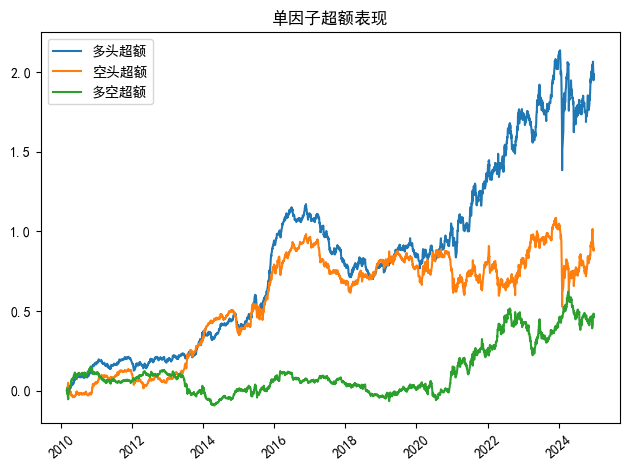

平均单边换手：0.775
年化交易成本:0.034 (未在超额中扣除)


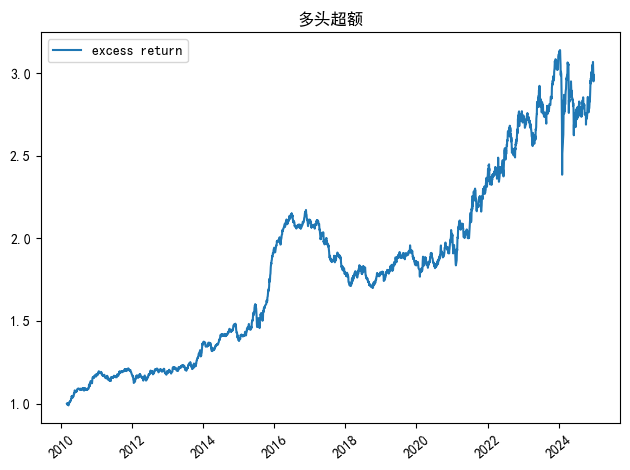

Rank IC: 0.37%
Rank ICIR: 0.05
t值: 0.66
年化收益率: 8.83%
年化波动率: 8.28%
信息比率: 1.07
最大回撤: 26.85%


In [81]:
res=config.backtest_stand(tech_momentum_factor,top=300,fre='month',stock_pool='888888')
# Rank IC
rank_ic = res['ic']['ic'].mean()
# Rank ICIR
rank_icir = res['ic']['ic'].mean() / res['ic']['ic'].std()
# t值
t_value = res['ic']['ic'].mean() / (res['ic']['ic'].std() / np.sqrt(res['ic']['ic'].count()))
perf = res['多空表现']['多头表现']  
annual_return = perf.loc['年化超额', 'mean']  # 年化收益率
annual_vol = perf.loc['波动率', 'mean']      # 年化波动率
info_ratio = perf.loc['信息比率', 'mean'] if '信息比率' in perf.index else annual_return / annual_vol
#win_rate = perf.loc['胜率', 'mean'] if '胜率' in perf.index else perf.loc['正月数', 'mean'] / perf.loc['总月数', 'mean']
max_drawdown = perf.loc['最大回撤', 'mean']
sharpe_ratio = annual_return / annual_vol
print(f"Rank IC: {rank_ic:.2%}")
print(f"Rank ICIR: {rank_icir:.2f}")
print(f"t值: {t_value:.2f}")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_vol:.2%}")
print(f"信息比率: {info_ratio:.2f}")
#print(f"夏普比率: {sharpe_ratio:.2f}")
#print(f"月度胜率: {win_rate:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")

可用的Barra因子: ['SIZE', 'SIZENL', 'EARNYILD', 'GROWTH', 'LEVERAGE', 'BTOP', 'LIQUIDTY', 'MOMENTUM', 'RESVOL', 'BETA']
共同时间点: 178个
时间范围: 2010-02-26 到 2024-11-29
市值      :   -0.96% (基于178个时间点)
非线性市值   :   -0.02% (基于178个时间点)
盈利      :   -0.64% (基于178个时间点)
成长      :    0.64% (基于178个时间点)
杠杆      :   -0.56% (基于178个时间点)
分红      :   -0.75% (基于178个时间点)
流动性     :    0.56% (基于178个时间点)
反转      :    0.17% (基于178个时间点)
波动率     :    0.13% (基于178个时间点)
贝塔      :    1.43% (基于178个时间点)


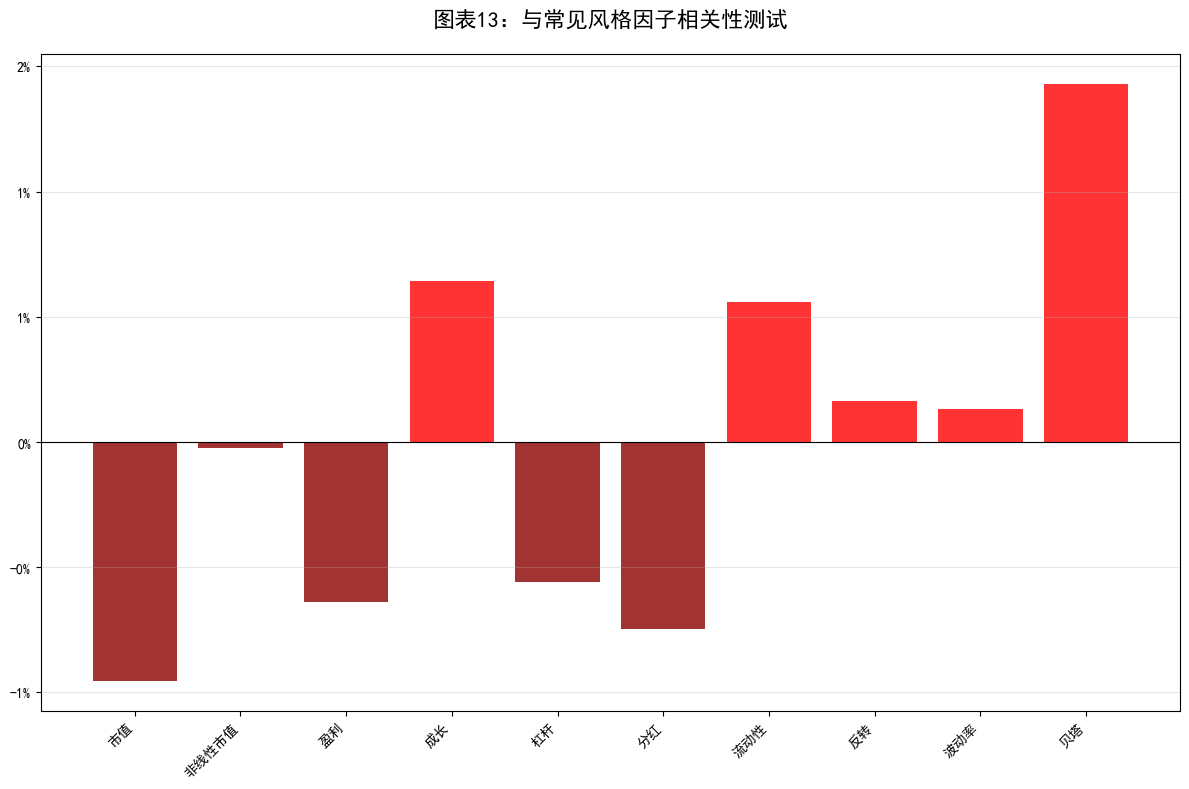

In [86]:
## 相关性分析
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# =============================================================================
# Barra因子mapping
# =============================================================================
with open(r'C:\Users\ZHOU\Documents\2025CUHK\兴银\需要拷的数据\packages\frdata\barra_df_tl.pkl', 'rb') as f:
    barra_df_tl = pickle.load(f)
barra_factor_mapping = {
    'SIZE': '市值',
    'SIZENL': '非线性市值', 
    'EARNYILD': '盈利',
    'GROWTH': '成长',
    'LEVERAGE': '杠杆',
    'BTOP': '分红',
    'LIQUIDTY': '流动性',
    'MOMENTUM': '反转',
    'RESVOL': '波动率',
    'BETA': '贝塔'
}

print(f"可用的Barra因子: {list(barra_factor_mapping.keys())}")

# =============================================================================
# 计算相关性
# ============================================================================


def calculate_factor_correlation(final_factor, barra_data, factor_mapping):
    """
    计算final_factor与各Barra因子的相关性
    """
    correlations = {}
    p_values = {}
    
    # 获取共同的时间点
    common_dates = []
    for date in final_factor.index:
        if date in barra_data.index:
            common_dates.append(date)
    
    print(f"共同时间点: {len(common_dates)}个")
    print(f"时间范围: {min(common_dates)} 到 {max(common_dates)}")
    
    if len(common_dates) < 3:
        print("共同时间点太少，无法计算相关性")
        return None, None
    
    # 对每个Barra因子计算相关性
    for eng_name, chn_name in factor_mapping.items():
        factor_corrs = []
        
        # 对每个共同日期计算截面相关性
        for date in common_dates:
            try:
                # 获取final_factor在该日期的值
                final_scores = final_factor.loc[date].dropna()
                
                # 获取Barra因子在该日期的值
                if isinstance(barra_data.loc[date], dict):
                    # 如果barra_data是字典格式
                    barra_scores = pd.Series(barra_data.loc[date][eng_name])
                else:
                    # 如果barra_data是其他格式
                    barra_scores = barra_data.loc[date][eng_name]
                
                # 找到共同股票
                common_stocks = list(set(final_scores.index) & set(barra_scores.index))
                
                if len(common_stocks) > 50:  # 至少50只股票才计算相关性
                    final_aligned = final_scores.reindex(common_stocks).dropna()
                    barra_aligned = barra_scores.reindex(common_stocks).dropna()
                    
                    # 再次对齐（去除任一因子为空的股票）
                    final_common = final_aligned.reindex(barra_aligned.index).dropna()
                    barra_common = barra_aligned.reindex(final_common.index).dropna()
                    
                    if len(final_common) > 20:
                        corr, _ = pearsonr(final_common, barra_common)
                        if not np.isnan(corr):
                            factor_corrs.append(corr)
                            
            except Exception as e:
                print(f"计算{date}的{eng_name}相关性时出错: {e}")
                continue
        
        # 计算平均相关性
        if len(factor_corrs) > 0:
            avg_corr = np.mean(factor_corrs)
            correlations[chn_name] = avg_corr
            print(f"{chn_name:8s}: {avg_corr:8.2%} (基于{len(factor_corrs)}个时间点)")
        else:
            print(f"{chn_name}: 无法计算相关性")
    
    return correlations

# 计算相关性
correlations = calculate_factor_correlation(tech_momentum_factor, barra_df_tl, barra_factor_mapping)

# =============================================================================
# 绘制相关性图表
# =============================================================================

if correlations and len(correlations) > 0:
    
    # 准备绘图数据
    factors = list(correlations.keys())
    corr_values = [correlations[factor] for factor in factors]
    
    # 创建颜色（正相关用红色，负相关用深红色）
    colors = ['red' if corr >= 0 else 'darkred' for corr in corr_values]
    
    # 绘制柱状图
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(factors)), corr_values, color=colors, alpha=0.8)
    
    # 设置图表属性
    plt.title('图表13：与常见风格因子相关性测试', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('')
    plt.ylabel('')
    
    # 设置x轴标签
    plt.xticks(range(len(factors)), factors, rotation=45, ha='right')
    

    # 添加零线
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # 设置y轴格式
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0%}'))
    
    # 调整布局
    plt.tight_layout()

    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
    
